<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

| Feature       |Description   |
| :------------ | :----------- |
| customerID | Customer ID |
| gender | Whether the customer is a male or a female |
| SeniorCitizen |  Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No)

In [1]:
from IPython.display import display

import pandas as pd
pd.options.display.max_columns = None

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# set style
sns.set_style('whitegrid')
# overriding font size and line width
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# don't print matching warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
!ls

README.md                            boy-bye-meme.jpg
WA_Fn-UseC_-Telco-Customer-Churn.csv hackathon.ipynb


In [3]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [5]:
data.isnull().any().any()

False

In [6]:
data.drop(['customerID'], axis=1, inplace=True)

In [7]:
columns = ['Partner', 'Dependents', 'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

for col in columns:
    data[col] = pd.Series(np.where(data[col].values == 'Yes', 1, 0), data.index, dtype='object')

data['gender'] = pd.Series(np.where(data['gender'].values == 'Male', 1, 0), data.index, dtype='object')
data['SeniorCitizen'] = data.SeniorCitizen.astype('object')
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


**Sneaky**

`pd.to_numeric(data['TotalCharges'])`

Fails because 
>ValueError: Unable to parse string " " at position 488


In [8]:
data['TotalCharges'].loc[488]

' '

In [9]:
empty = data[data['TotalCharges'] == ' '].index
empty

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

In [10]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [11]:
data.TotalCharges.fillna(value = data.tenure *  data.MonthlyCharges, inplace = True)
data.TotalCharges.isnull().sum()

0

In [12]:
data.head(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
5,0,0,0,0,8,1,Yes,Fiber optic,0,0,1,0,1,1,Month-to-month,1,Electronic check,99.65,820.50,1
6,1,0,0,1,22,1,Yes,Fiber optic,0,1,0,0,1,0,Month-to-month,1,Credit card (automatic),89.10,1949.40,0
7,0,0,0,0,10,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,0,Mailed check,29.75,301.90,0
8,0,0,1,0,28,1,Yes,Fiber optic,0,0,1,1,1,1,Month-to-month,1,Electronic check,104.80,3046.05,1
9,1,0,0,1,62,1,No,DSL,1,1,0,0,0,0,One year,0,Bank transfer (automatic),56.15,3487.95,0


In [13]:
data.tail(25)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7018,1,0,1,1,1,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,70.65,70.65,1
7019,0,0,0,0,39,1,No,No,0,0,0,0,0,0,Two year,0,Mailed check,20.15,826.00,0
7020,1,0,1,1,12,1,No,No,0,0,0,0,0,0,Month-to-month,1,Electronic check,19.20,239.00,0
7021,1,0,0,0,12,1,No,DSL,0,0,0,1,1,0,One year,1,Electronic check,59.80,727.80,1
7022,1,0,0,0,72,1,Yes,Fiber optic,0,1,1,0,1,1,One year,1,Electronic check,104.95,7544.30,0
7023,0,1,1,0,63,1,Yes,Fiber optic,0,1,1,0,1,1,Month-to-month,1,Electronic check,103.50,6479.40,0
7024,1,0,1,0,44,1,Yes,Fiber optic,1,0,1,0,0,0,Month-to-month,1,Credit card (automatic),84.80,3626.35,0
7025,0,0,0,0,18,1,Yes,Fiber optic,0,0,1,1,0,1,Month-to-month,1,Bank transfer (automatic),95.05,1679.40,0
7026,0,0,0,0,9,1,No,DSL,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),44.20,403.35,1
7027,1,0,0,0,13,1,No,DSL,0,1,0,1,1,1,Month-to-month,0,Mailed check,73.35,931.55,0


In [14]:
unique_list = ['MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']

for unique in unique_list:
    print('{}: {}'.format(unique, data[unique].unique()))

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [15]:
for unique in unique_list:
    print(unique)
    print(data[unique].value_counts())
    print()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64



In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(1), object(17)
memory usage: 1.1+ MB


In [17]:
data.describe(include = 'object')

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,2,2,2,2,2,2,3,2,4,2
top,1,0,0,0,1,No,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,0
freq,3555,5901,3641,4933,6361,3390,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


In [18]:
data.describe(include = ['int64', 'float64'])

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [19]:
columns += ['gender', 'SeniorCitizen']
data[columns] = data[columns].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(14), object(4)
memory usage: 1.1+ MB


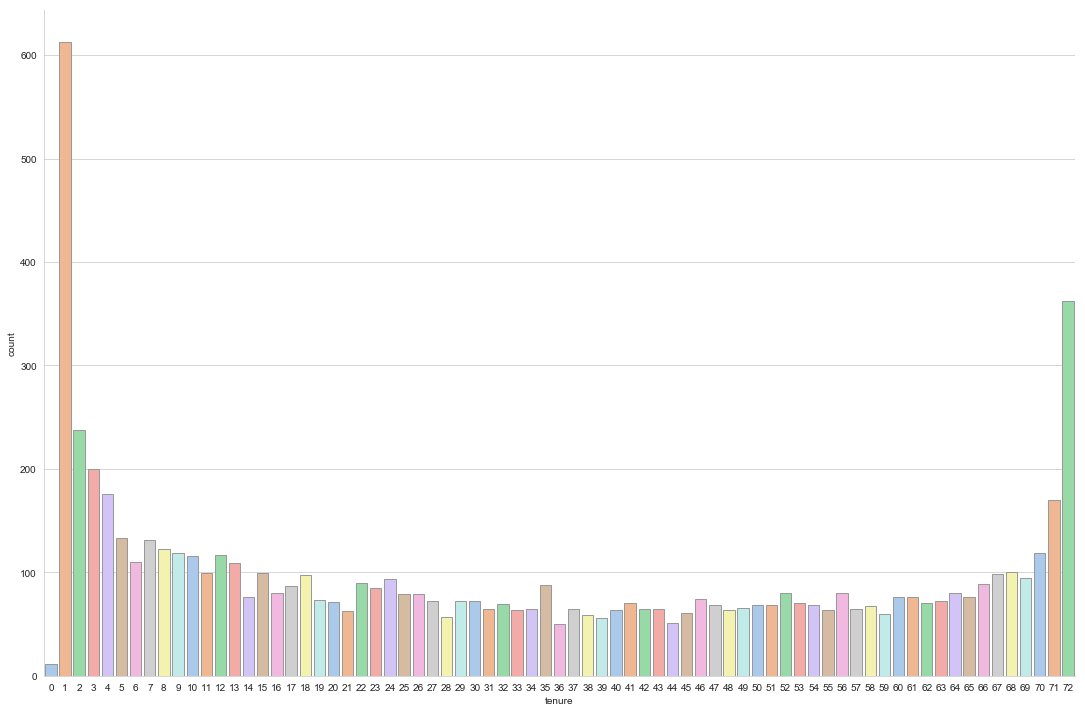

In [20]:
sns.catplot(x='tenure', kind='count', palette='pastel', edgecolor=".6", height=10, aspect=1.5, data=data);

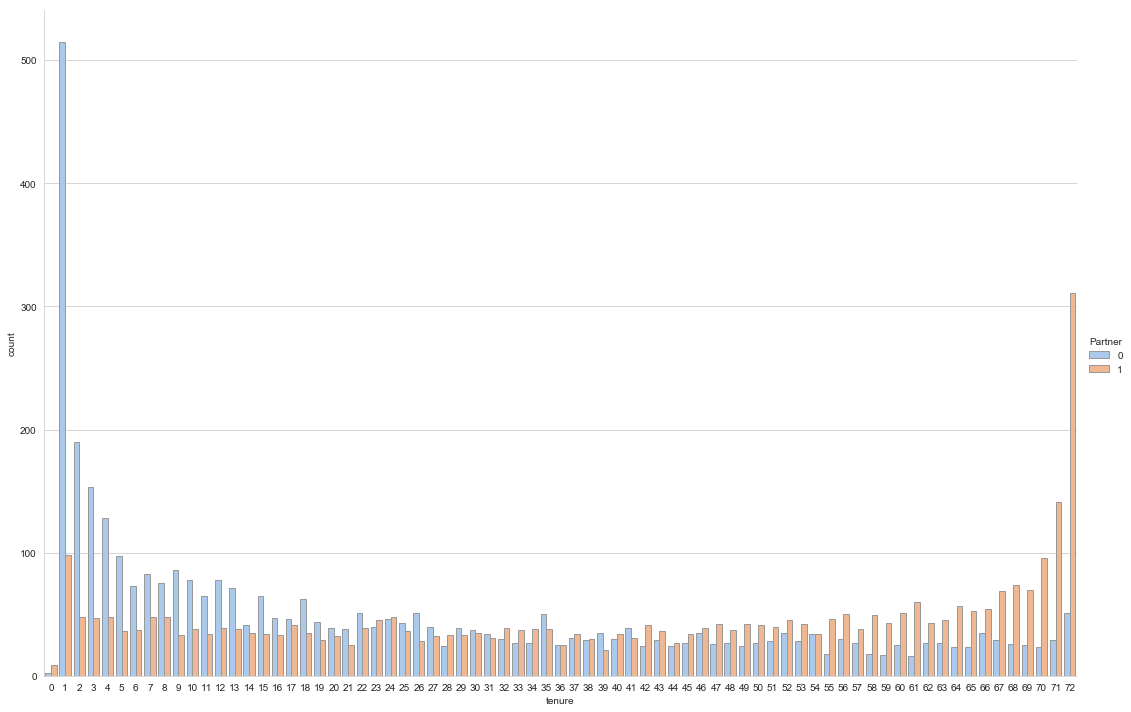

In [21]:
sns.catplot(x='tenure', kind='count', hue='Partner', palette='pastel', 
            edgecolor=".6", height=10, aspect=1.5, data=data);

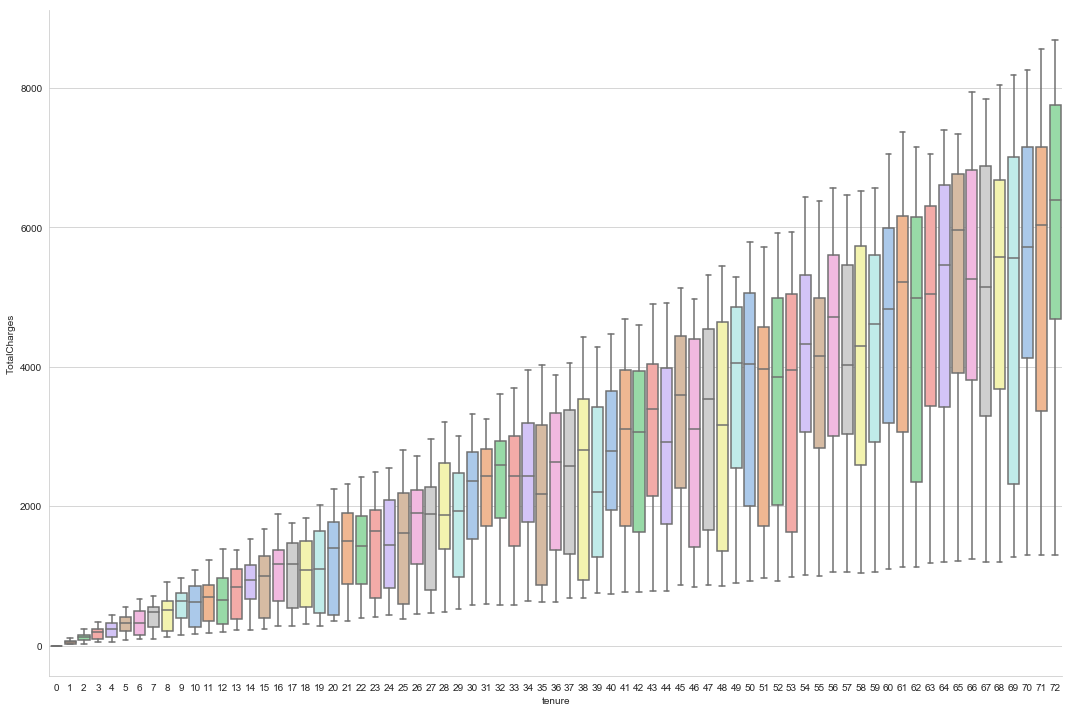

In [22]:
sns.catplot(x='tenure', y='TotalCharges', kind='box', palette='pastel', 
            height=10, aspect=1.5, data=data);

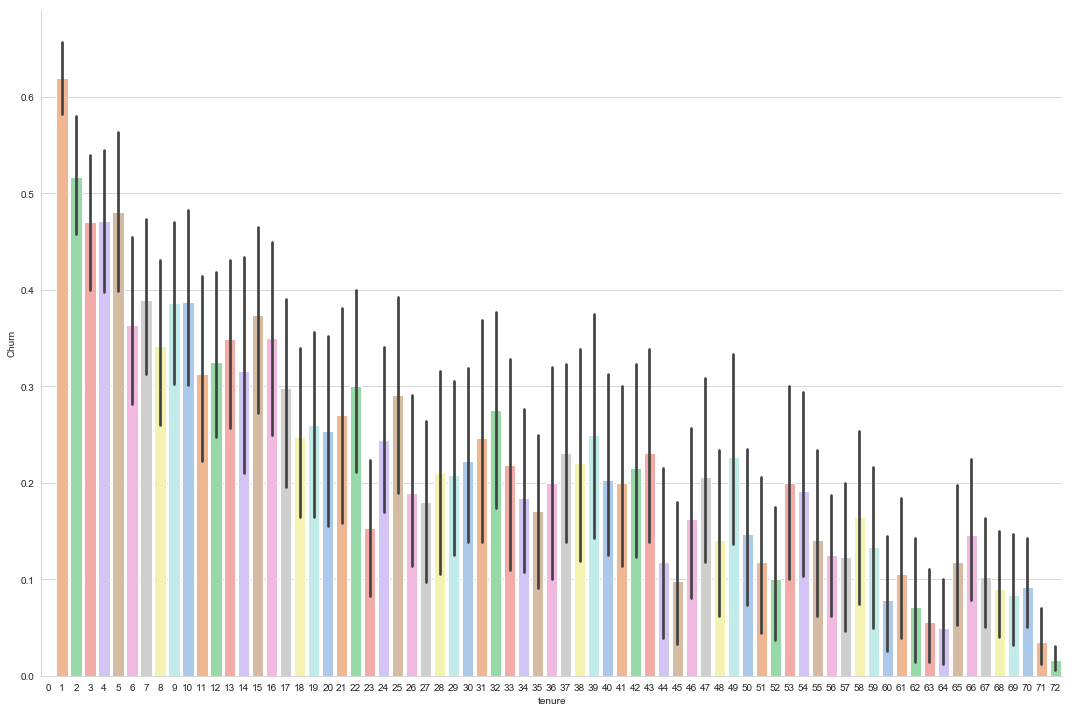

In [23]:
sns.catplot(x='tenure', y='Churn', kind='bar', palette='pastel', 
            height=10, aspect=1.5, data=data);

In [24]:
data['Num_OnlineServices'] = (data[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies', 'TechSupport',
                                    'StreamingTV', 'OnlineBackup']] == 1).sum(axis=1)

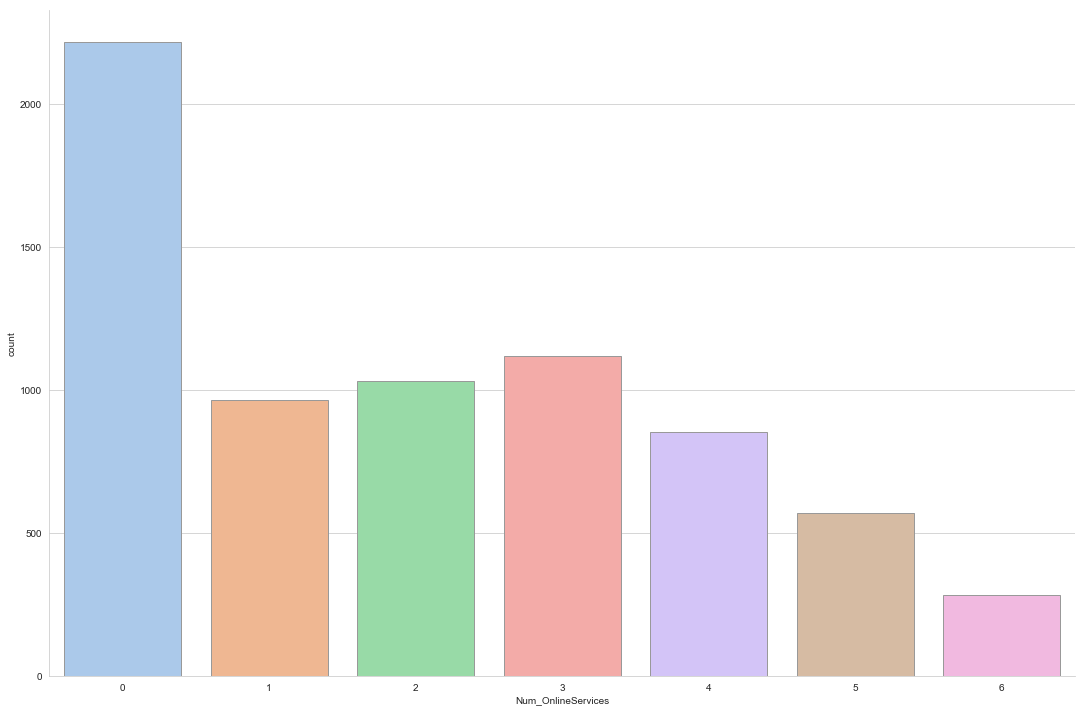

In [25]:
sns.catplot(x='Num_OnlineServices', kind='count', palette='pastel', 
            edgecolor=".6", height=10, aspect=1.5, data=data);

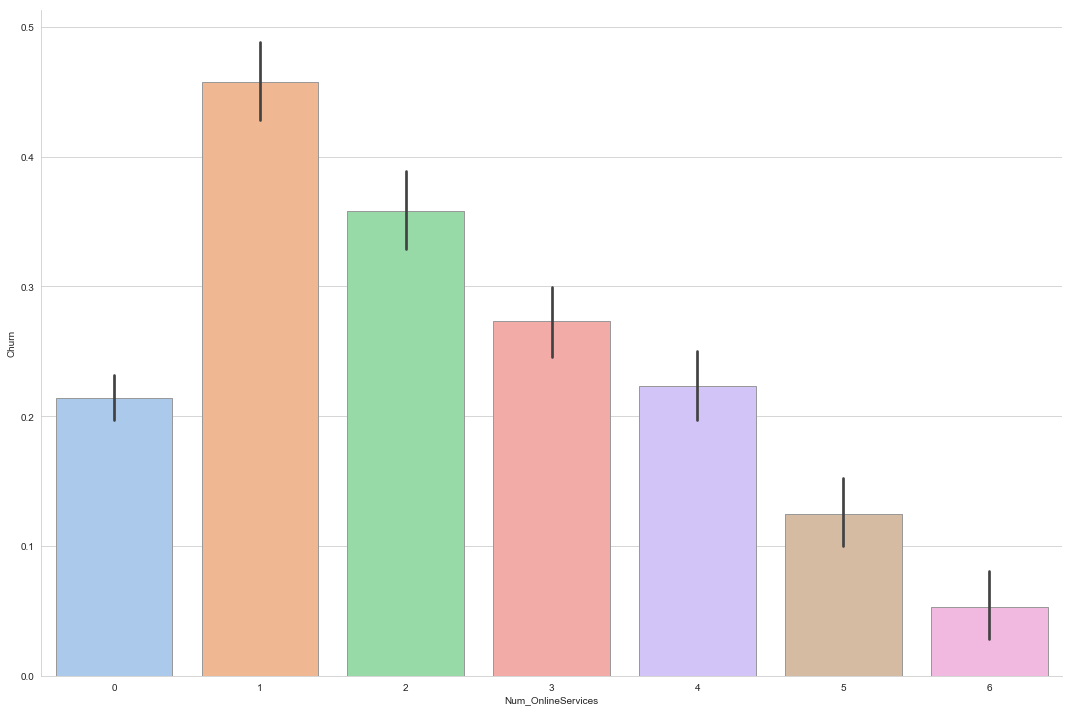

In [26]:
sns.catplot(x='Num_OnlineServices', y='Churn', kind='bar', palette='pastel', 
            edgecolor=".6", height=10, aspect=1.5, data=data);

In [27]:
data.gender.value_counts()

1    3555
0    3488
Name: gender, dtype: int64

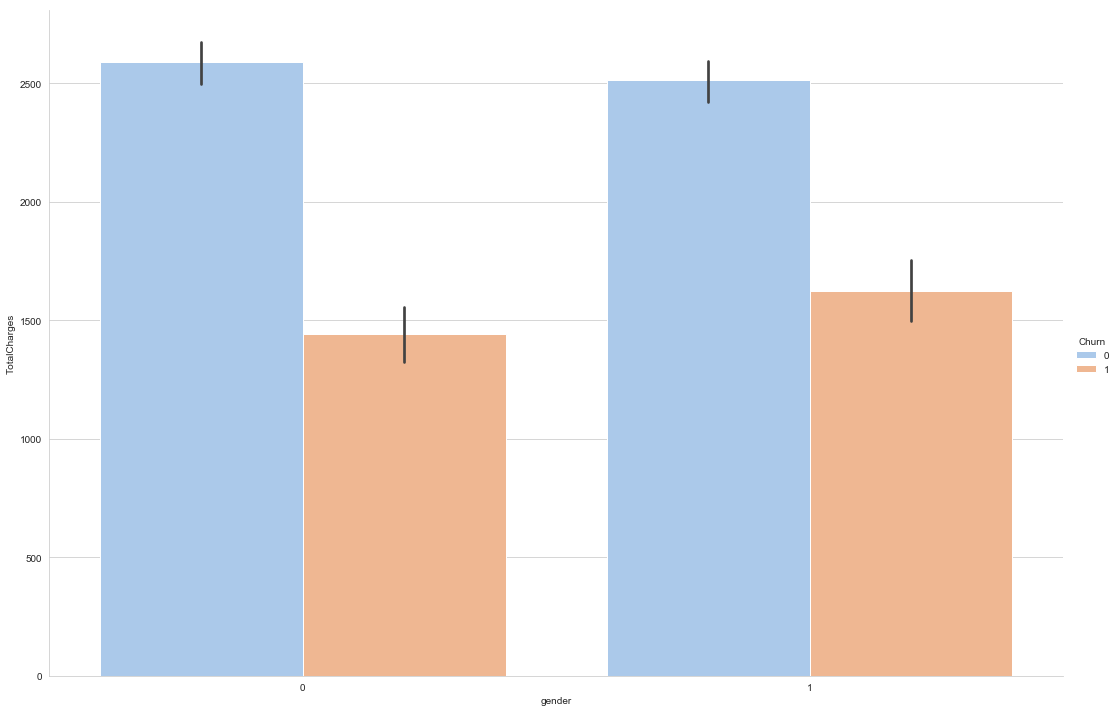

In [28]:
sns.catplot(x='gender', y='TotalCharges', kind='bar', hue='Churn', palette='pastel', 
            height=10, aspect=1.5, data=data);

In [29]:
data.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

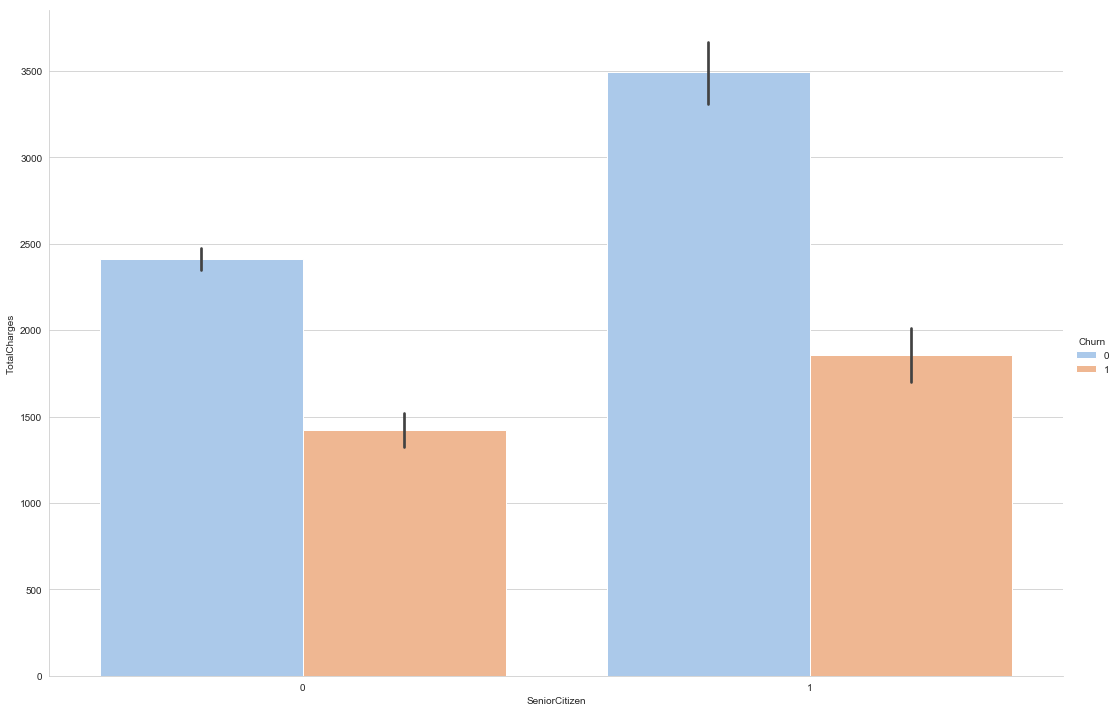

In [30]:
sns.catplot(x='SeniorCitizen', y='TotalCharges', kind='bar', hue='Churn', palette='pastel', 
            height=10, aspect=1.5, data=data);

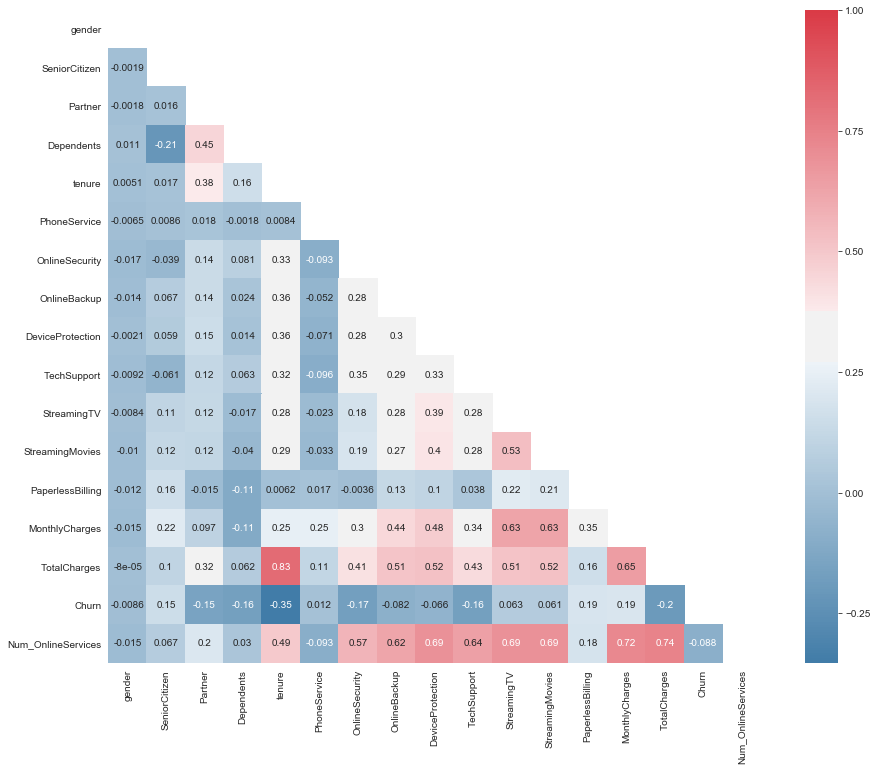

In [31]:
# Set the style of the visualization
sns.set_style('white')

# Create a convariance matrix
corr = data.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = None

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(16, 12))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, sep=20, n=9, as_cmap=True)

# Draw the heatmapwith the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, mask=mask, square=True, annot=True)

plt.show();

In [32]:
data.drop('Num_OnlineServices', axis=1, inplace=True)

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

In [62]:
y = data['Churn']
X = data.drop(['Churn'], axis=1)

In [63]:
X = pd.get_dummies(data=X, columns=unique_list, drop_first=True)

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

(5634, 24) (1409, 24)


In [67]:
# Create the pipeline
pipe = Pipeline([('scl', Normalizer()),
                 ('clf', ExtraTreesClassifier(random_state=0, n_jobs=-1))])

param_range = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# Create the grid parameter
grid_params = [{'clf__n_estimators': param_range}]

# Create the grid, with "pipe" as the estimator
gridsearch = GridSearchCV(estimator=pipe,
                          param_grid=grid_params,
                          scoring='accuracy',
                          cv=3)

# Fit using grid search
gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scl', Normalizer(copy=True, norm='l2')), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None...ators='warn', n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'clf__n_estimators': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [68]:
# Best accuracy
print('Best accuracy: %.3f' % gridsearch.best_score_)

# Best params
print('\nBest params:\n', gridsearch.best_params_)

Best accuracy: 0.776

Best params:
 {'clf__n_estimators': 18}


In [69]:
pipe = Pipeline([('scl', Normalizer()),
                 ('clf', ExtraTreesClassifier(n_estimators=18, random_state=0, n_jobs=-1))])
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scl', Normalizer(copy=True, norm='l2')), ('clf', ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=18, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False))])

In [70]:
score = pipe.score(X_test, y_test)
print('Test Accuarcy: {:.2f}%'.format(score * 100))

Test Accuarcy: 79.21%


In [71]:
cross_val_score(pipe, X_train, y_train)

array([0.78233103, 0.7800852 , 0.76664891])

In [72]:
y_pred = pipe.predict(X_test)
print("Testing Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))

Testing Accuracy: 79.21%


In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.87      1036
           1       0.65      0.46      0.54       373

   micro avg       0.79      0.79      0.79      1409
   macro avg       0.74      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409

